<a href="https://colab.research.google.com/github/bobaoxu2001/PSTAT122/blob/main/1007_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Dictionary**

---



**Target Feature**:
+ `damage_grade`: level of damage to the building that was hit by the earthquake. There are 2 grades of the damage:

  + `0` represents low damage
  + `1` represents moderate to high damage

**Predictors**: <br>
* `geo_level_1_id, geo_level_2_id, geo_level_3_id_group` : geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3).
* `count_floors_pre_eq`: number of floors in the building before the earthquake.
* `age`: age of the building in years
* `area_percentage`: normalized area of the building footprint.
* `height_percentage`: normalized height of the building.
footprint.
* `land_surface_condition`: surface condition of the land where the building was built.
* `foundation_type`: type of foundation used while building.
* `roof_type`: type of roof used while building.
* `ground_floor_type`: type of the ground floor.
* `other_floor_type`: type of constructions used above the ground floor.
* `position`: position of the building
* `plan_configuration`: building plan configuration.
* `has_superstructure_adobe_mud`: flag variable that indicates if the superstructure was made of Adobe/Mud.
* `has_superstructure_mud_mortar_stone`: flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* `has_superstructure_stone_flag`: flag variable that indicates if the superstructure was made of Stone.
* `has_superstructure_cement_mortar_stone`: flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_mud_mortar_brick`: flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_cement_mortar_brick`: flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* `has_superstructure_timber`: flag variable that indicates if the superstructure was made of Timber.
* `has_superstructure_bamboo`: flag variable that indicates if the superstructure was made of Bamboo.
* `has_superstructure_rc_non_engineered`: flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
* `has_superstructure_rc_engineered`: flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* `has_superstructure_other`: flag variable that indicates if the superstructure was made of any other material.
* `legal_ownership_status`: legal ownership status of the land where the building was built.
* `count_families`: number of families that live in the building.
* `has_secondary_use`: flag variable that indicates if the building was used for any secondary purpose.
* `has_secondary_use_agriculture`: flag variable that indicates if the building was used for agricultural purposes.
* `has_secondary_use_hotel`: flag variable that indicates if the building was used as a hotel.
* `has_secondary_use_rental`: flag variable that indicates if the building was used for rental purposes.
* `has_secondary_use_institution`: flag variable that indicates if the building was used as a location of any institution.
* `has_secondary_use_school`: flag variable that indicates if the building was used as a school.
* `has_secondary_use_industry`: flag variable that indicates if the building was used for industrial purposes.
* `has_secondary_use_health_post`: flag variable that indicates if the building was used as a health post.
* `has_secondary_use_gov_office`: flag variable that indicates if the building was used fas a government office.
* `has_secondary_use_use_police`: flag variable that indicates if the building was used as a police station.
* `has_secondary_use_other`: flag variable that indicates if the building was secondarily used for other purposes.

# **Richter's Predictor: Modeling Earthquake Damage**

The impact of an earthquake is profound and far-reaching, displacing communities and destroying the infrastructure their lives depend on. A smart understanding of a building’s ability to withstand earthquakes can focus efforts to improve building infrastructure and mitigate the damage caused by future earthquakes. In this project, we will solve a binary classification focused on predicting the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal, based on aspects of building location and construction.

We will evaluate prediction quality according to a [Log-Loss Error Function](https://www.kaggle.com/dansbecker/what-is-log-loss). (Note that this is different than Percent Accuracy!) As you know, a good statistical model is paramount for helping organizations allocate maintenance resources effectively. We’ve sourced this problem from [DrivenData](https://www.drivendata.org/).

# **Load Data**

We stored my data in our google drive. Feel free to change the path so that you can reload it.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/1007_data_project/train.csv")
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,319954,10,151,7723,4,5,19,12,t,i,...,1,0,0,0,0,0,0,0,0,0
1,109339,10,1407,9774,3,30,5,5,t,r,...,0,0,0,0,0,0,0,0,0,1
2,326182,21,581,2565,3,10,6,7,t,r,...,0,0,0,0,0,0,0,0,0,1
3,309380,6,1277,7577,3,30,7,7,t,r,...,0,0,0,0,0,0,0,0,0,1
4,116482,8,1114,8002,2,0,5,5,t,r,...,0,0,0,0,0,0,0,0,0,1


# **Load Packages**

Here are some necessary packages we are using.

In [ ]:
# Load packages here;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
sns.set_style("whitegrid")

In [ ]:
!pip install xgboost
import xgboost as xgb

# Exploratory Data Analysis (EDA)

## 1. Dataset Overview

In [ ]:
# we try to observe the basic stats property of the dataset
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208480 entries, 0 to 208479
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             208480 non-null  int64 
 1   geo_level_1_id                          208480 non-null  int64 
 2   geo_level_2_id                          208480 non-null  int64 
 3   geo_level_3_id                          208480 non-null  int64 
 4   count_floors_pre_eq                     208480 non-null  int64 
 5   age                                     208480 non-null  int64 
 6   area_percentage                         208480 non-null  int64 
 7   height_percentage                       208480 non-null  int64 
 8   land_surface_condition                  208480 non-null  object
 9   foundation_type                         208480 non-null  object
 10  roof_type                               208480 non-null 

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,...,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000
mean,230315.056509,13.900979,701.049477,6260.862869,2.129729,26.633490,8.022794,5.434459,0.088757,0.761852,...,0.033413,0.008010,0.000950,0.000341,0.001103,0.000182,0.000153,0.000091,0.005017,0.334210
std,75224.174815,8.041721,412.708954,3646.147665,0.727376,74.119612,4.399647,1.914803,0.284393,0.425951,...,0.179714,0.089142,0.030803,0.018451,0.033197,0.013500,0.012388,0.009546,0.070655,0.471715
min,100001.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,165207.750000,7.000000,349.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230412.500000,12.000000,703.000000,6280.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,295377.500000,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,360601.000000,30.000000,1427.000000,12567.000000,9.000000,995.000000,96.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


According to the features in the Dataset

**Numerical Features:**
- `count_floors_pre_eq`, `age`, `area_percentage`, `height_percentage`, etc.

**Categorical Features:**
-  `land_surface_condition`, `foundation_type`, `roof_type`, etc.

**Binary Flag Features:**
- `has_superstructure_adobe_mud`, `has_secondary_use_hotel`, etc.


We will do statistical modeling for each category.

## 2. Missing Value Detection:

In [ ]:
# check missing value.
train.isnull().sum() * 100 / len(train)

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

## 3. Target Variable visualization

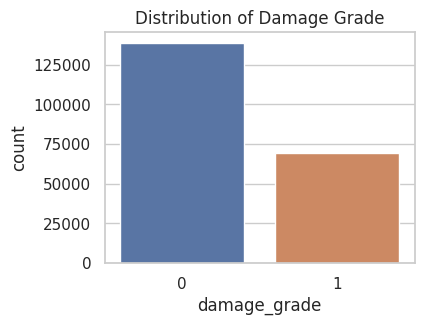

In [ ]:
# we try to visualize the target variable damage_grade.

plt.figure(figsize=(4,3))
sns.countplot(data=train, x='damage_grade')
plt.title('Distribution of Damage Grade')
plt.show()


## 4. Numerical Features and Categorical Features Visualization

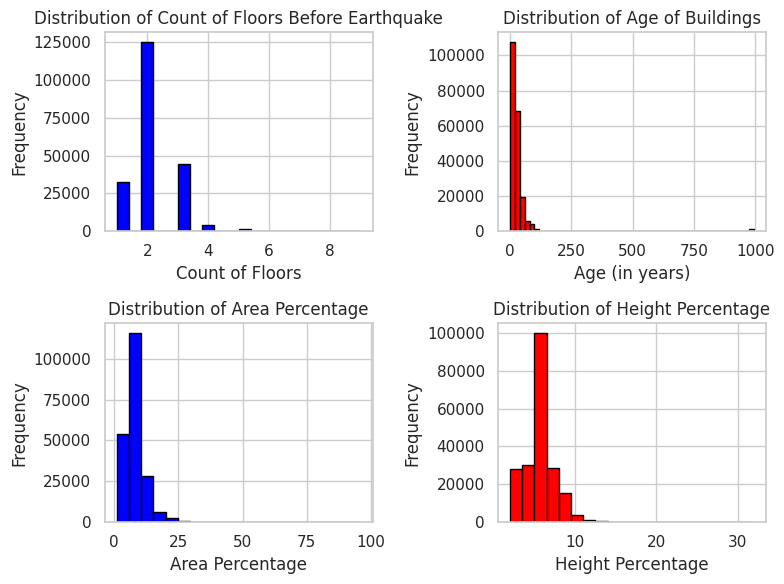

In [ ]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Plot the distribution of count_floors_pre_eq
axes[0, 0].hist(train['count_floors_pre_eq'], bins=20, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribution of Count of Floors Before Earthquake')
axes[0, 0].set_xlabel('Count of Floors')
axes[0, 0].set_ylabel('Frequency')

# Plot the distribution of age
axes[0, 1].hist(train['age'], bins=50, color='red', edgecolor='black')
axes[0, 1].set_title('Distribution of Age of Buildings')
axes[0, 1].set_xlabel('Age (in years)')
axes[0, 1].set_ylabel('Frequency')

# Plot the distribution of area_percentage
axes[1, 0].hist(train['area_percentage'], bins=20, color='blue', edgecolor='black')
axes[1, 0].set_title('Distribution of Area Percentage')
axes[1, 0].set_xlabel('Area Percentage')
axes[1, 0].set_ylabel('Frequency')

# Plot the distribution of height_percentage
axes[1, 1].hist(train['height_percentage'], bins=20, color='red', edgecolor='black')
axes[1, 1].set_title('Distribution of Height Percentage')
axes[1, 1].set_xlabel('Height Percentage')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In terms of these model, we say

**Count of Floors Before Earthquake:** Most buildings have between 1 to 3 floors, with a few having more than that.

**Age of Buildings:** A large number of buildings are relatively new (0-50 years), but there's a significant number that are older. There are some buildings with age values that seem anomalously high (possibly outliers or data entry errors).

**Area Percentage:** Most buildings have an area percentage in the lower range, indicating that a significant portion of buildings occupy a smaller percentage of the total plot area.

**Height Percentage:** The distribution indicates that most buildings have a height percentage in the 5-10 range.

### Normalization

Since All distribution are right-skewed, I will use **log transformation** to normalize them, and renewed the original column.

In [ ]:
def log_transform(data):
    return np.log(data + 1)  # Adding 1 to avoid log(0)

# Apply log transformation to the right-skewed features
train['count_floors_pre_eq'] = log_transform(train['count_floors_pre_eq'])
train['age'] = log_transform(train['age'])
train['area_percentage'] = log_transform(train['area_percentage'])
train['height_percentage'] = log_transform(train['height_percentage'])


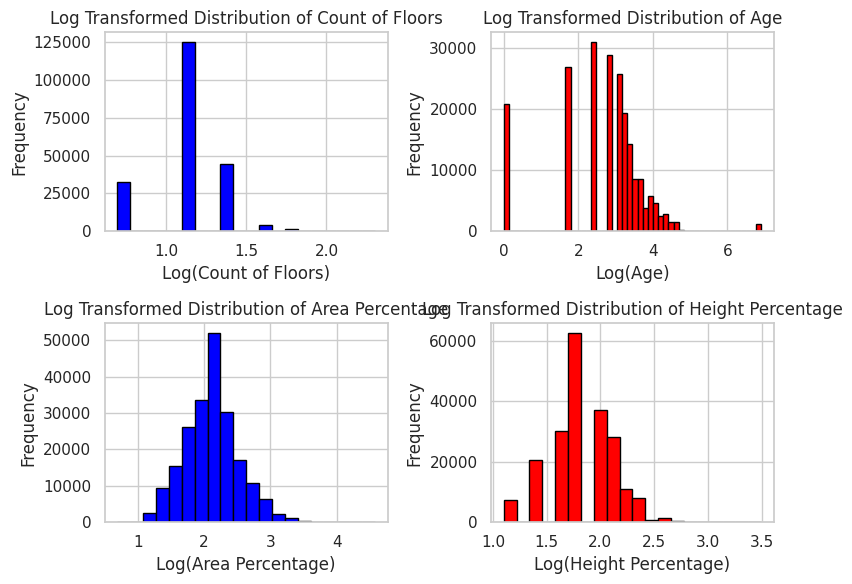

In [ ]:
# Set up the figure and axes for the subplots after transformation
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Plot the distribution of log transformed count_floors_pre_eq
axes[0, 0].hist(train['count_floors_pre_eq'], bins=20, color='blue', edgecolor='black')
axes[0, 0].set_title('Log Transformed Distribution of Count of Floors')
axes[0, 0].set_xlabel('Log(Count of Floors)')
axes[0, 0].set_ylabel('Frequency')

# Plot the distribution of log transformed age
axes[0, 1].hist(train['age'], bins=50, color='red', edgecolor='black')
axes[0, 1].set_title('Log Transformed Distribution of Age')
axes[0, 1].set_xlabel('Log(Age)')
axes[0, 1].set_ylabel('Frequency')

# Plot the distribution of log transformed area_percentage
axes[1, 0].hist(train['area_percentage'], bins=20, color='blue', edgecolor='black')
axes[1, 0].set_title('Log Transformed Distribution of Area Percentage')
axes[1, 0].set_xlabel('Log(Area Percentage)')
axes[1, 0].set_ylabel('Frequency')

# Plot the distribution of log transformed height_percentage
axes[1, 1].hist(train['height_percentage'], bins=20, color='red', edgecolor='black')
axes[1, 1].set_title('Log Transformed Distribution of Height Percentage')
axes[1, 1].set_xlabel('Log(Height Percentage)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

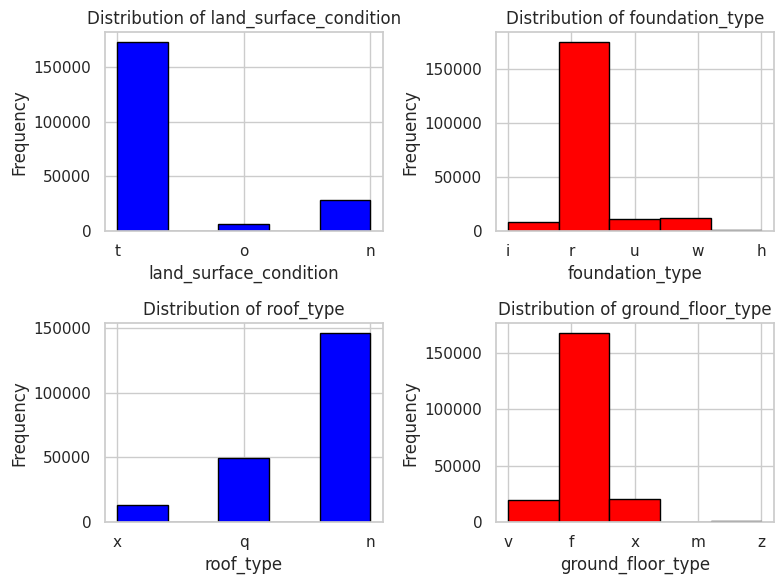

In [ ]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Plot the distribution of land_surface_condition
axes[0, 0].hist(train['land_surface_condition'], bins=5, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribution of land_surface_condition')
axes[0, 0].set_xlabel('land_surface_condition')
axes[0, 0].set_ylabel('Frequency')

# Plot the distribution of foundation_type
axes[0, 1].hist(train['foundation_type'], bins=5, color='red', edgecolor='black')
axes[0, 1].set_title('Distribution of foundation_type')
axes[0, 1].set_xlabel('foundation_type')
axes[0, 1].set_ylabel('Frequency')

# Plot the distribution of roof_type
axes[1, 0].hist(train['roof_type'], bins=5, color='blue', edgecolor='black')
axes[1, 0].set_title('Distribution of roof_type')
axes[1, 0].set_xlabel('roof_type')
axes[1, 0].set_ylabel('Frequency')

# Plot the distribution of ground_floor_type
axes[1, 1].hist(train['ground_floor_type'], bins=5, color='red', edgecolor='black')
axes[1, 1].set_title('Distribution of ground_floor_type')
axes[1, 1].set_xlabel('ground_floor_type')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In terms of these models,

**Land Surface Condition:** The majority of buildings are constructed as "t", with the other two conditions "o" and "n" being less frequent.

**Foundation Type:** There's a dominant foundation type "r" used in most buildings, while other foundation types are less common.

**Roof Type:** "n" is significantly more common than the others.

**Ground Floor Type:** "f" is predominantly used in most buildings.


**No Resampling:** Meanwhile, we see biased features due to imblanced scales of data. Therefore, we use decision-tree methods such as Xgboost, Light Xgboost to avoid this question, instead of resampling.

# Feature Engineering

## 1. Outliers Optimization:

### Age:

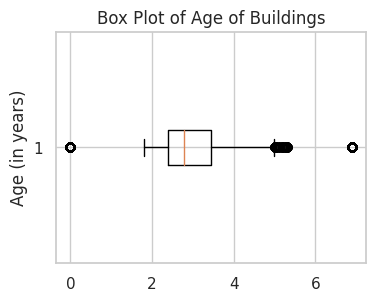

In [ ]:
# Since there is no missing value, we then consider about Outliers.
# In the EDA, we found "Age" might have potential outliers even if we use log-transformation.
plt.figure(figsize=(4, 3))
plt.boxplot(train['age'], vert = False)
plt.title('Box Plot of Age of Buildings')
plt.ylabel('Age (in years)')
plt.show()

**Original Log Transformed Age Distribution:**

 The box plot above presents the distribution of log-transformed ages. This transformation already mitigates some of the impact of outliers, but there are still points that lie outside the whiskers, indicating outliers.

In [ ]:
# Identify outliers in the updated 'age' column
Q1_log = train['age'].quantile(0.25)
Q3_log = train['age'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Filter out outliers in the log transformed age
log_age_no_outliers = train['age'].apply(lambda x: upper_bound_log if x > upper_bound_log else (lower_bound_log if x < lower_bound_log else x))

log_age_no_outliers

0         1.791759
1         3.433987
2         2.397895
3         3.433987
4         0.843757
            ...   
208475    3.044522
208476    2.397895
208477    2.397895
208478    2.772589
208479    2.397895
Name: age, Length: 208480, dtype: float64

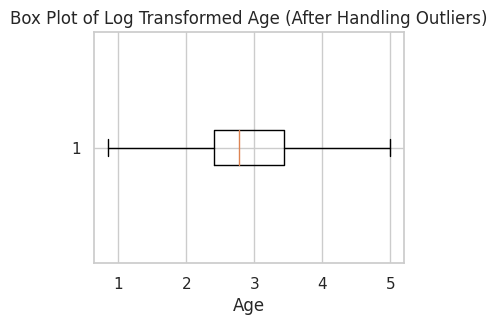

In [ ]:
# Visualize the box plot of log_age after handling outliers
plt.figure(figsize=(4, 3))
plt.boxplot(log_age_no_outliers, vert=False)
plt.title('Box Plot of Log Transformed Age (After Handling Outliers)')
plt.xlabel('Age')
plt.show()

**Log Transformed Age Distribution After Handling Outliers:**

 The second box plot illustrates the 'log_age' data after addressing outliers. Outliers beyond the whiskers have been capped at the upper bound or raised to the lower bound, leading to a distribution that is more robust to extreme values. This adjustment is crucial for analyses where the presence of outliers can significantly skew results.

### Area Percentage:

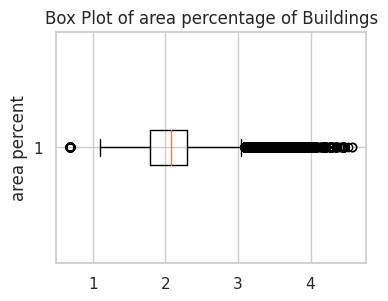

In [ ]:
# In the EDA, we found "area_percentage" might have potential outliers even if we use log-transformation.
plt.figure(figsize=(4, 3))
plt.boxplot(train['area_percentage'], vert = False)
plt.title('Box Plot of area percentage of Buildings')
plt.ylabel('area percent')
plt.show()

**Original Log Transformed Area percentage Distribution:**

 The box plot above presents the distribution of log-transformed area percentage. This transformation already mitigates some of the impact of outliers, but there are still points that lie outside the whiskers, indicating outliers.

In [ ]:
# Identify outliers in the updated 'area_percentage' column
Q1_log = train['area_percentage'].quantile(0.25)
Q3_log = train['area_percentage'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Filter out outliers in the log transformed area
log_area_no_outliers = train['area_percentage'].apply(lambda x: upper_bound_log if x > upper_bound_log else (lower_bound_log if x < lower_bound_log else x))

log_area_no_outliers

0         2.995732
1         1.791759
2         1.945910
3         2.079442
4         1.791759
            ...   
208475    2.302585
208476    2.302585
208477    3.068824
208478    2.079442
208479    1.386294
Name: area_percentage, Length: 208480, dtype: float64

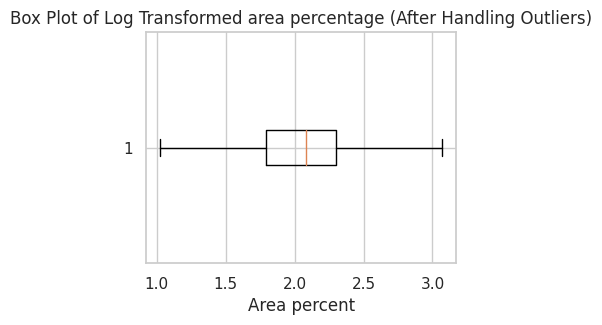

In [ ]:
# Visualize the box plot of log_area_percent after handling outliers
plt.figure(figsize=(4, 3))
plt.boxplot(log_area_no_outliers, vert=False)
plt.title('Box Plot of Log Transformed area percentage (After Handling Outliers)')
plt.xlabel('Area percent')
plt.show()

**Log Transformed area percentage Distribution After Handling Outliers:**

 The second box plot illustrates the 'log_area_percent' data after addressing outliers. Outliers beyond the whiskers have been capped at the upper bound or raised to the lower bound, leading to a distribution that is more robust to extreme values. This adjustment is crucial for analyses where the presence of outliers can significantly skew results.

### Height Percentage:

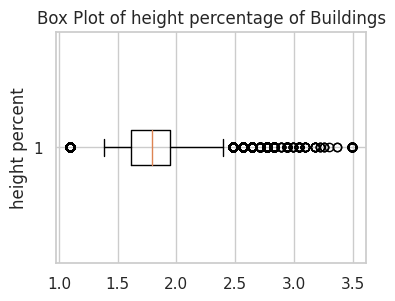

In [ ]:
# In the EDA, we found "height_percentage" might have potential outliers even if we use log-transformation.
plt.figure(figsize=(4, 3))
plt.boxplot(train['height_percentage'], vert = False)
plt.title('Box Plot of height percentage of Buildings')
plt.ylabel('height percent')
plt.show()

**Original Log Transformed Height percentage Distribution:**

 The box plot above presents the distribution of log-transformed height percentage. This transformation already mitigates some of the impact of outliers, but there are still points that lie outside the whiskers, indicating outliers.

In [ ]:
# Identify outliers in the updated 'height' column
Q1_log = train['height_percentage'].quantile(0.25)
Q3_log = train['height_percentage'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Filter out outliers in the log transformed height
log_high_no_outliers = train['height_percentage'].apply(lambda x: upper_bound_log if x > upper_bound_log else (lower_bound_log if x < lower_bound_log else x))

log_high_no_outliers

0         2.450619
1         1.791759
2         2.079442
3         2.079442
4         1.791759
            ...   
208475    1.791759
208476    1.791759
208477    1.386294
208478    2.079442
208479    1.386294
Name: height_percentage, Length: 208480, dtype: float64

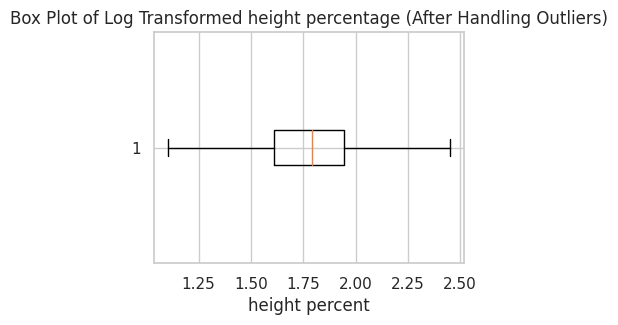

In [ ]:
# Visualize the box plot of log_high_percent after handling outliers
plt.figure(figsize=(4, 3))
plt.boxplot(log_high_no_outliers, vert=False)
plt.title('Box Plot of Log Transformed height percentage (After Handling Outliers)')
plt.xlabel('height percent')
plt.show()

**Log Transformed height percentage Distribution After Handling Outliers:**

 The second box plot illustrates the 'log_high_percent' data after addressing outliers. Outliers beyond the whiskers have been capped at the upper bound or raised to the lower bound, leading to a distribution that is more robust to extreme values. This adjustment is crucial for analyses where the presence of outliers can significantly skew results.

## 2. Data Manipulation

**Interaction Features:** create a new feature called "building_volume" as a product of "area_percentage" and "height_percentage".

**Binning:** create bins for the age feature and categorize buildings as "new", "moderately old", and "old".


In [ ]:
# Create the interaction feature: building_volume
train['building_volume'] = log_area_no_outliers * log_high_no_outliers

# Binning the 'age' feature
bins = [0, 25, 75, float('inf')]
labels = ['new', 'moderately_old', 'old']
train['age_category'] = pd.cut(log_age_no_outliers, bins=bins, labels=labels, right=False)
train[['building_volume', 'age', 'age_category']].head()


,building_volume,age,age_category
0,7.341397,1.791759,new
1,3.210402,3.433987,new
2,4.046406,2.397895,new
3,4.324077,3.433987,new
4,3.210402,0.000000,new


## 3. Data Preprocessing
After we tackled the missing value and feature engineer, we ought to do data preprocessing.

By observing the dataset, we have three operations here.

**Encode Categorical Variables:** Since we have categorical features, we'll need to convert them into a numerical format.

**Normalize/Standardize Numerical Features:** This step ensures all numerical features have the same scale, which can be crucial for PCA or other algorithms.

**Data Split:** Classical step to split the dataset into training and validation sets.

In [ ]:
# One-hot encode the categorical features
categorical_features = ['other_floor_type','position','plan_configuration','land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'age_category','legal_ownership_status']
data_encoded = pd.get_dummies(train, columns=categorical_features, drop_first=True)

In [ ]:
# Standardize the numerical features
numerical_features = ['count_floors_pre_eq', 'age', 'building_volume']
data_encoded[numerical_features] = (data_encoded[numerical_features] - data_encoded[numerical_features].mean()) / data_encoded[numerical_features].std()

data_encoded['area_percentage'] = (log_area_no_outliers - log_area_no_outliers.mean())/log_area_no_outliers.std()
data_encoded['height_percentage'] = (log_high_no_outliers - log_high_no_outliers.mean())/log_high_no_outliers.std()

In [ ]:
# Split the data into training and validation sets (75% - 25% split)
X = data_encoded.drop(['building_id', 'damage_grade'], axis=1)
y = data_encoded['damage_grade']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,random_state = 42)

X_train.shape, X_val.shape

((156360, 63), (52120, 63))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156360 entries, 167322 to 121958
Data columns (total 63 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   geo_level_1_id                          156360 non-null  int64  
 1   geo_level_2_id                          156360 non-null  int64  
 2   geo_level_3_id                          156360 non-null  int64  
 3   count_floors_pre_eq                     156360 non-null  float64
 4   age                                     156360 non-null  float64
 5   area_percentage                         156360 non-null  float64
 6   height_percentage                       156360 non-null  float64
 7   has_superstructure_adobe_mud            156360 non-null  int64  
 8   has_superstructure_mud_mortar_stone     156360 non-null  int64  
 9   has_superstructure_stone_flag           156360 non-null  int64  
 10  has_superstructure_cement_mortar_stone 

Now, we see all types of data are trainable by any model. So we begin the model training part.

# Model Building (Without Feature Selection)

We know that for tree-based model, they will conduct general feature selection during the training process, so here we don't use feature selection to train the model.

In [ ]:
# Add code here to build your predictive models

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.9, colsample_bytree=0.9)
xgb_model.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_probs_xgb = xgb_model.predict_proba(X_val)
logloss_val_xgb = log_loss(y_val, y_val_probs_xgb)

logloss_val_xgb

0.4631127889746675

In [ ]:
import lightgbm as lgb

# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(objective="binary", n_estimators=500, learning_rate=0.05,
                               num_leaves=50, subsample=0.9, colsample_bytree=0.9)
lgb_model.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_probs_lgb = lgb_model.predict_proba(X_val)
logloss_val_lgb = log_loss(y_val, y_val_probs_lgb)

logloss_val_lgb

[LightGBM] [Info] Number of positive: 52179, number of negative: 104181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 156360, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333711 -> initscore=-0.691450
[LightGBM] [Info] Start training from score -0.691450


0.4440876418821584

Now, we utilize Optuna to do hyperparameter optimization.

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00


# Model Evaluation (Without Feature Selection)

In [ ]:
# Add code here to evalute your models.
import optuna

# Define the objective function for Optuna
def objective(trial):

    # Define hyperparameter search space
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    # Create a LightGBM dataset
    dtrain = lgb.Dataset(X_train, label=y_train)

    try:
        cv_results = lgb.cv(params, dtrain, nfold=3, stratified=True, shuffle=True)
        if 'valid binary_logloss-mean' in cv_results:
            return cv_results['valid binary_logloss-mean'][-1]
        else:
            print(f"Available keys in cv_results: {cv_results.keys()}")
            return float('inf')
    except Exception as e:
        print(f"Error encountered: {e}")
        return float('inf')

# Create a study object and specify the direction is 'minimize' as we want to minimize log-loss
study = optuna.create_study(direction='minimize')

# Optimize the study, the objective function is passed in as the first argument
study.optimize(objective, n_trials=10)  # We're running only 10 trials for demonstration

best_params = study.best_params
best_score = study.best_value

best_params, best_score

[I 2023-12-06 19:13:19,302] A new study created in memory with name: no-name-d1610758-edf1-4a24-9fa7-b6d8ec2cc6a2
[I 2023-12-06 19:14:15,542] Trial 0 finished with value: 0.4408703618049464 and parameters: {'num_leaves': 158, 'feature_fraction': 0.9283818796852824, 'bagging_fraction': 0.861917198049085, 'bagging_freq': 7, 'min_child_samples': 37}. Best is trial 0 with value: 0.4408703618049464.
[I 2023-12-06 19:14:30,032] Trial 1 finished with value: 0.44107227377741 and parameters: {'num_leaves': 163, 'feature_fraction': 0.65549465995338, 'bagging_fraction': 0.7186750143952219, 'bagging_freq': 6, 'min_child_samples': 71}. Best is trial 0 with value: 0.4408703618049464.
[I 2023-12-06 19:14:44,937] Trial 2 finished with value: 0.4429180839631138 and parameters: {'num_leaves': 156, 'feature_fraction': 0.5313154061313456, 'bagging_fraction': 0.7390879538985418, 'bagging_freq': 2, 'min_child_samples': 34}. Best is trial 0 with value: 0.4408703618049464.
[I 2023-12-06 19:15:01,112] Trial 3 

({'num_leaves': 213,
  'feature_fraction': 0.6893289017230235,
  'bagging_fraction': 0.8617993051920574,
  'bagging_freq': 4,
  'min_child_samples': 58},
 0.43784915069868396)

In [ ]:
# Best hyperparameters from the Bayesian optimization


# Training the model on the entire training dataset
final_model = lgb.LGBMClassifier(**best_params)
final_model.fit(X_train, y_train)

# Predicting probabilities on the training set
train_probs = final_model.predict_proba(X_train)[:, 1]

# Calculating log-loss on the training set
log_loss_train = log_loss(y_train, train_probs)

log_loss_train


[LightGBM] [Warning] feature_fraction is set=0.6893289017230235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6893289017230235
[LightGBM] [Warning] bagging_fraction is set=0.8617993051920574, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8617993051920574
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6893289017230235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6893289017230235
[LightGBM] [Warning] bagging_fraction is set=0.8617993051920574, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8617993051920574
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Number of positive: 52179, number of negative: 104181
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.210315 seconds.
You ca

0.38898274007289546

In [ ]:
# Predict probabilities on the validation set
y_val_probs_lgb = final_model.predict_proba(X_val)
logloss_val_lgb = log_loss(y_val, y_val_probs_lgb)

logloss_val_lgb

[LightGBM] [Warning] feature_fraction is set=0.6893289017230235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6893289017230235
[LightGBM] [Warning] bagging_fraction is set=0.8617993051920574, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8617993051920574
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


0.4333192367898211

# Model Building (With feature selection)


In case the performance is better if we include feature selection, here we use feature_importance_ command and select the top 20 features to see whether the performance is better compared to the model without feature selection.

In [ ]:
# Initialize the XGBoost classifier
xgb_model2 = xgb.XGBClassifier(objective="binary:logistic", n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.9, colsample_bytree=0.9)
xgb_model2.fit(X_train, y_train)

# Initialize the LightGBM classifier
lgb_model2 = lgb.LGBMClassifier(objective="binary", n_estimators=500, learning_rate=0.05,
                               num_leaves=50, subsample=0.9, colsample_bytree=0.9)
lgb_model2.fit(X_train, y_train)



[LightGBM] [Info] Number of positive: 52179, number of negative: 104181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 156360, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333711 -> initscore=-0.691450
[LightGBM] [Info] Start training from score -0.691450


LGBMClassifier(colsample_bytree=0.9, learning_rate=0.05, n_estimators=500,
               num_leaves=50, objective='binary', subsample=0.9)

In [ ]:
# For XGBoost
xgb_importance = xgb_model.feature_importances_

# For LightGBM
lgb_importance = lgb_model.feature_importances_

# Convert to a DataFrame for easier handling
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'XGB_Importance': xgb_importance,
    'LGB_Importance': lgb_importance
})

# Sort features based on importance
feature_importance_df = feature_importance_df.sort_values(by='XGB_Importance', ascending=False)

# Select top N features, for example, top 20
selected_features = feature_importance_df['Feature'].head(20).tolist()


### Feature Importance Visualization

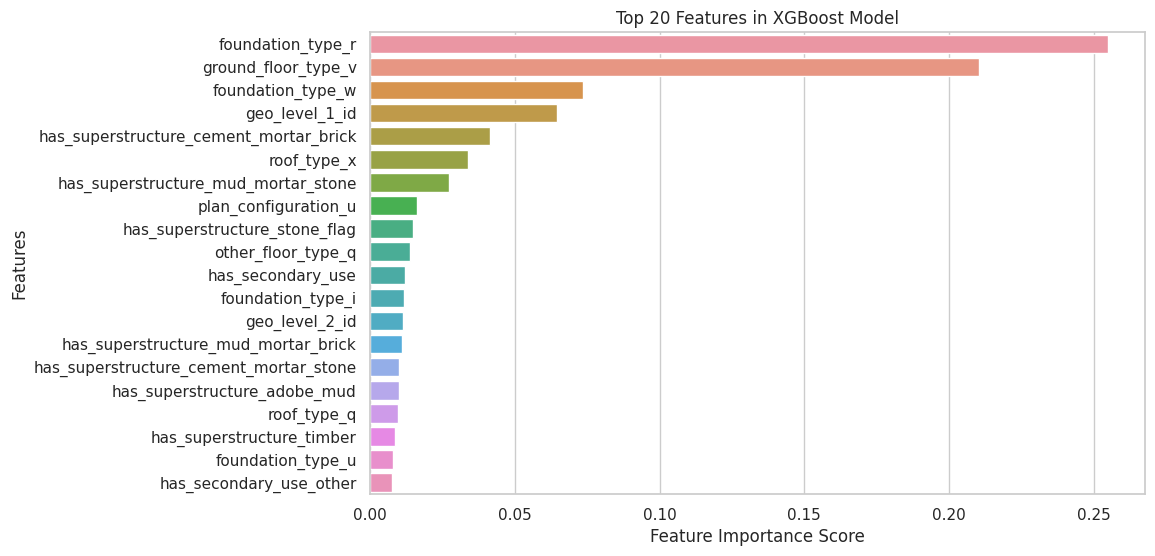

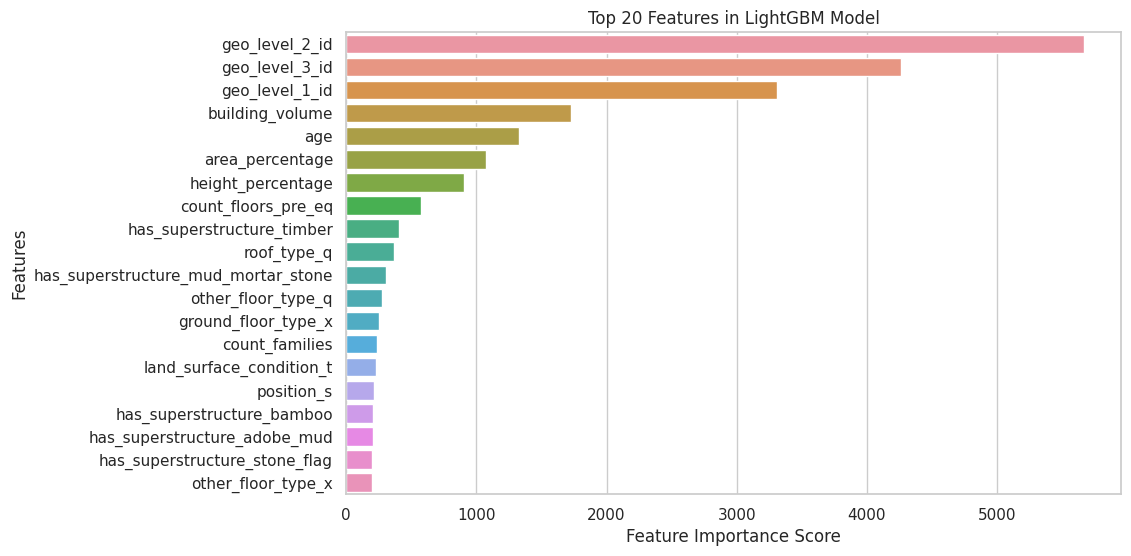

In [ ]:
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot for XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x="XGB_Importance", y="Feature", data=feature_importance_df.sort_values(by="XGB_Importance", ascending=False).head(20))
plt.title('Top 20 Features in XGBoost Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

# Plot for LightGBM
plt.figure(figsize=(10, 6))
sns.barplot(x="LGB_Importance", y="Feature", data=feature_importance_df.sort_values(by="LGB_Importance", ascending=False).head(20))
plt.title('Top 20 Features in LightGBM Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
# Restrict training and validation data to selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

# Initialize the models
xgb_model2 = xgb.XGBClassifier()
lgb_model2 = lgb.LGBMClassifier()

# Retrain XGBoost with selected features
xgb_model2.fit(X_train_selected, y_train)

# Retrain LightGBM with selected features
lgb_model2.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
# For XGBoost
y_val_probs_xgb = xgb_model2.predict_proba(X_val_selected)
logloss_val_xgb = log_loss(y_val, y_val_probs_xgb)

y_val_probs_lgb = lgb_model2.predict_proba(X_val_selected)
logloss_val_lgb = log_loss(y_val, y_val_probs_lgb)

# Print accuracy for both models
print(f'XGBoost Model Accuracy with Selected Features: {logloss_val_xgb}')
print(f'LightGBM Model Accuracy with Selected Features: {logloss_val_lgb}')

[LightGBM] [Info] Number of positive: 52179, number of negative: 104181
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 156360, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333711 -> initscore=-0.691450
[LightGBM] [Info] Start training from score -0.691450
XGBoost Model Accuracy with Selected Features: 0.45060652988953714
LightGBM Model Accuracy with Selected Features: 0.4664580301150093


# Model Evaluation (With feature selection)

In [ ]:
import optuna

# Define the objective function for Optuna
def objective(trial):

    # Define hyperparameter search space
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    # Create a LightGBM dataset
    dtrain = lgb.Dataset(X_train_selected, label=y_train)

    try:
        cv_results = lgb.cv(params, dtrain, nfold=3, stratified=True, shuffle=True)
        if 'valid binary_logloss-mean' in cv_results:
            return cv_results['valid binary_logloss-mean'][-1]
        else:
            print(f"Available keys in cv_results: {cv_results.keys()}")
            return float('inf')
    except Exception as e:
        print(f"Error encountered: {e}")
        return float('inf')

# Create a study object and specify the direction is 'minimize' as we want to minimize log-loss
study = optuna.create_study(direction='minimize')

# Optimize the study, the objective function is passed in as the first argument
study.optimize(objective, n_trials=10)  # We're running only 10 trials for demonstration

best_params = study.best_params
best_score = study.best_value

best_params, best_score

[I 2023-12-06 19:17:16,599] A new study created in memory with name: no-name-7d473c5c-21ac-484b-8eae-334c9517d1ac
[I 2023-12-06 19:17:31,586] Trial 0 finished with value: 0.4485591692862411 and parameters: {'num_leaves': 119, 'feature_fraction': 0.9396032345052064, 'bagging_fraction': 0.9239377203750392, 'bagging_freq': 7, 'min_child_samples': 74}. Best is trial 0 with value: 0.4485591692862411.
[I 2023-12-06 19:17:44,565] Trial 1 finished with value: 0.44613338025371924 and parameters: {'num_leaves': 208, 'feature_fraction': 0.6190196427457584, 'bagging_fraction': 0.7290118487834989, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 1 with value: 0.44613338025371924.
[I 2023-12-06 19:17:58,618] Trial 2 finished with value: 0.44437136506743585 and parameters: {'num_leaves': 245, 'feature_fraction': 0.6822794674273918, 'bagging_fraction': 0.9329813064299475, 'bagging_freq': 4, 'min_child_samples': 32}. Best is trial 2 with value: 0.44437136506743585.
[I 2023-12-06 19:18:12,148]

({'num_leaves': 245,
  'feature_fraction': 0.6822794674273918,
  'bagging_fraction': 0.9329813064299475,
  'bagging_freq': 4,
  'min_child_samples': 32},
 0.44437136506743585)

In [ ]:
# Training the model on the entire training dataset
final_model2 = lgb.LGBMClassifier(**best_params)
final_model2.fit(X_train_selected, y_train)

# Predicting probabilities on the training set
train_probs = final_model2.predict_proba(X_train_selected)[:, 1]

# Calculating log-loss on the training set
log_loss_train = log_loss(y_train, train_probs)

# Extracting feature importances
feature_importances = final_model2.feature_importances_

log_loss_train

[LightGBM] [Warning] feature_fraction is set=0.6822794674273918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6822794674273918
[LightGBM] [Warning] bagging_fraction is set=0.9329813064299475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9329813064299475
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6822794674273918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6822794674273918
[LightGBM] [Warning] bagging_fraction is set=0.9329813064299475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9329813064299475
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Number of positive: 52179, number of negative: 104181
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038375 seconds.
You ca

0.4225782328524438

In [ ]:
# Predict probabilities on the validation set
y_val_probs_lgb = final_model2.predict_proba(X_val_selected)
logloss_val_lgb = log_loss(y_val, y_val_probs_lgb)

logloss_val_lgb

[LightGBM] [Warning] feature_fraction is set=0.6822794674273918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6822794674273918
[LightGBM] [Warning] bagging_fraction is set=0.9329813064299475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9329813064299475
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


0.4425762241970046

# Comparison between models with feature selection or not:

Here we see that after we do feature selection and pick up the top 20 features to retrain the XGBoost and Light XGBoost model. The final log loss validation (Light XGBoost model) is 0.42793816966801523 vs 0.4393136925328818. So we choose **not to select features but preserve all features here**. And the final log loss value for light XGBoost will be around 0.4279.

# Test Prediction



In [ ]:
testFeatures= pd.read_csv("/content/drive/My Drive/1007_data_project/test.csv")

testFeatures.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,114565,4,529,4583,2,40,7,5,t,u,...,0,0,0,0,0,0,0,0,0,0
1,132642,22,170,286,2,30,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
2,333379,20,1402,3794,2,40,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,137682,8,396,4772,3,20,5,7,o,r,...,0,0,0,0,0,0,0,0,0,0
4,246829,20,190,3473,2,5,7,6,t,w,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# check missing value.
testFeatures.isnull().sum() * 100 / len(train)

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [ ]:
testFeatures.info()
testFeatures.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52121 entries, 0 to 52120
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             52121 non-null  int64 
 1   geo_level_1_id                          52121 non-null  int64 
 2   geo_level_2_id                          52121 non-null  int64 
 3   geo_level_3_id                          52121 non-null  int64 
 4   count_floors_pre_eq                     52121 non-null  int64 
 5   age                                     52121 non-null  int64 
 6   area_percentage                         52121 non-null  int64 
 7   height_percentage                       52121 non-null  int64 
 8   land_surface_condition                  52121 non-null  object
 9   foundation_type                         52121 non-null  object
 10  roof_type                               52121 non-null  object
 11  gr

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,...,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000,52121.000000
mean,230244.775043,13.897853,701.175515,6245.929491,2.129698,26.141191,7.999079,5.433990,0.088199,0.762265,...,0.065079,0.034477,0.008461,0.000902,0.000441,0.000940,0.000211,0.000115,0.000077,0.005526
std,75249.858004,8.001194,412.721795,3647.267939,0.728823,71.307635,4.362432,1.932828,0.283586,0.425700,...,0.246668,0.182454,0.091595,0.030016,0.021002,0.030647,0.014526,0.010729,0.008760,0.074129
min,100002.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164921.000000,7.000000,352.000000,3057.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,229977.000000,12.000000,701.000000,6224.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,295756.000000,21.000000,1050.000000,9413.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,360598.000000,30.000000,1427.000000,12565.000000,8.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


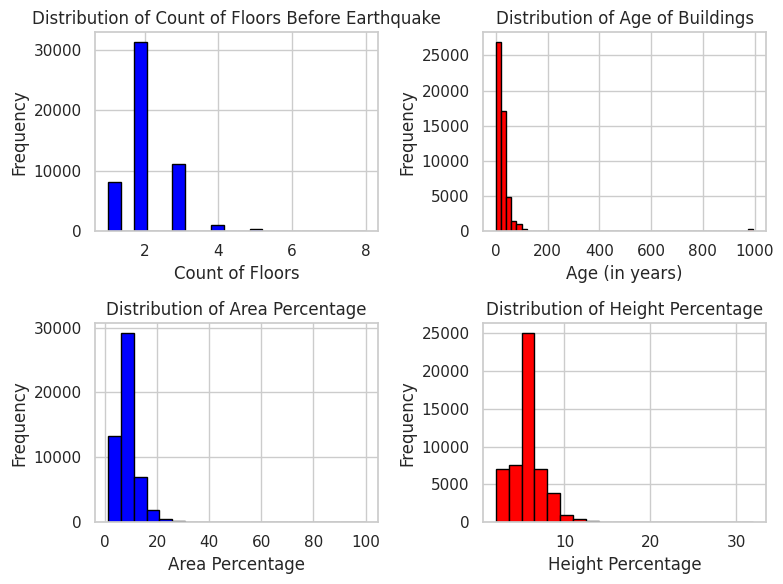

In [ ]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Plot the distribution of count_floors_pre_eq
axes[0, 0].hist(testFeatures['count_floors_pre_eq'], bins=20, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribution of Count of Floors Before Earthquake')
axes[0, 0].set_xlabel('Count of Floors')
axes[0, 0].set_ylabel('Frequency')

# Plot the distribution of age
axes[0, 1].hist(testFeatures['age'], bins=50, color='red', edgecolor='black')
axes[0, 1].set_title('Distribution of Age of Buildings')
axes[0, 1].set_xlabel('Age (in years)')
axes[0, 1].set_ylabel('Frequency')

# Plot the distribution of area_percentage
axes[1, 0].hist(testFeatures['area_percentage'], bins=20, color='blue', edgecolor='black')
axes[1, 0].set_title('Distribution of Area Percentage')
axes[1, 0].set_xlabel('Area Percentage')
axes[1, 0].set_ylabel('Frequency')

# Plot the distribution of height_percentage
axes[1, 1].hist(testFeatures['height_percentage'], bins=20, color='red', edgecolor='black')
axes[1, 1].set_title('Distribution of Height Percentage')
axes[1, 1].set_xlabel('Height Percentage')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
def log_transform(data):
    return np.log(data + 1)  # Adding 1 to avoid log(0)

# Apply log transformation to the right-skewed features
testFeatures['count_floors_pre_eq'] = log_transform(testFeatures['count_floors_pre_eq'])
testFeatures['age'] = log_transform(testFeatures['age'])
testFeatures['area_percentage'] = log_transform(testFeatures['area_percentage'])
testFeatures['height_percentage'] = log_transform(testFeatures['height_percentage'])


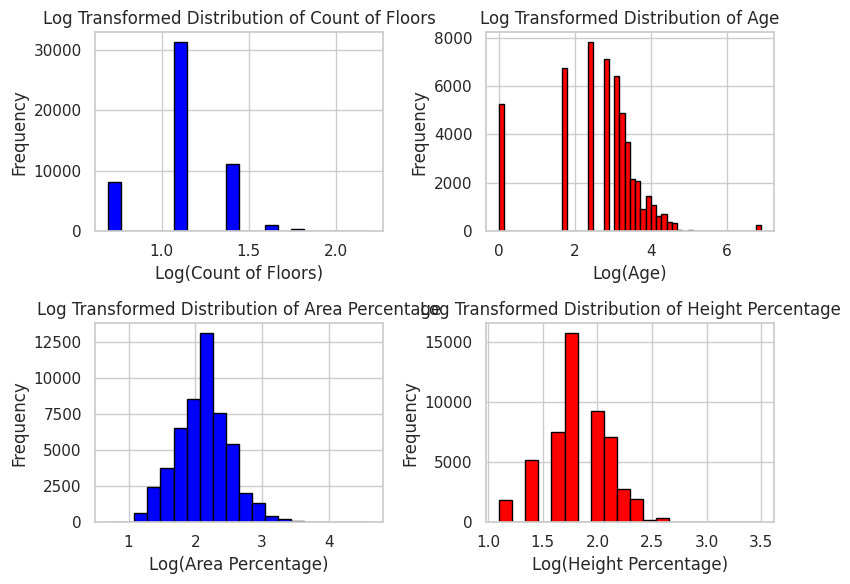

In [ ]:
# Set up the figure and axes for the subplots after transformation
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Plot the distribution of log transformed count_floors_pre_eq
axes[0, 0].hist(testFeatures['count_floors_pre_eq'], bins=20, color='blue', edgecolor='black')
axes[0, 0].set_title('Log Transformed Distribution of Count of Floors')
axes[0, 0].set_xlabel('Log(Count of Floors)')
axes[0, 0].set_ylabel('Frequency')

# Plot the distribution of log transformed age
axes[0, 1].hist(testFeatures['age'], bins=50, color='red', edgecolor='black')
axes[0, 1].set_title('Log Transformed Distribution of Age')
axes[0, 1].set_xlabel('Log(Age)')
axes[0, 1].set_ylabel('Frequency')

# Plot the distribution of log transformed area_percentage
axes[1, 0].hist(testFeatures['area_percentage'], bins=20, color='blue', edgecolor='black')
axes[1, 0].set_title('Log Transformed Distribution of Area Percentage')
axes[1, 0].set_xlabel('Log(Area Percentage)')
axes[1, 0].set_ylabel('Frequency')

# Plot the distribution of log transformed height_percentage
axes[1, 1].hist(testFeatures['height_percentage'], bins=20, color='red', edgecolor='black')
axes[1, 1].set_title('Log Transformed Distribution of Height Percentage')
axes[1, 1].set_xlabel('Log(Height Percentage)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

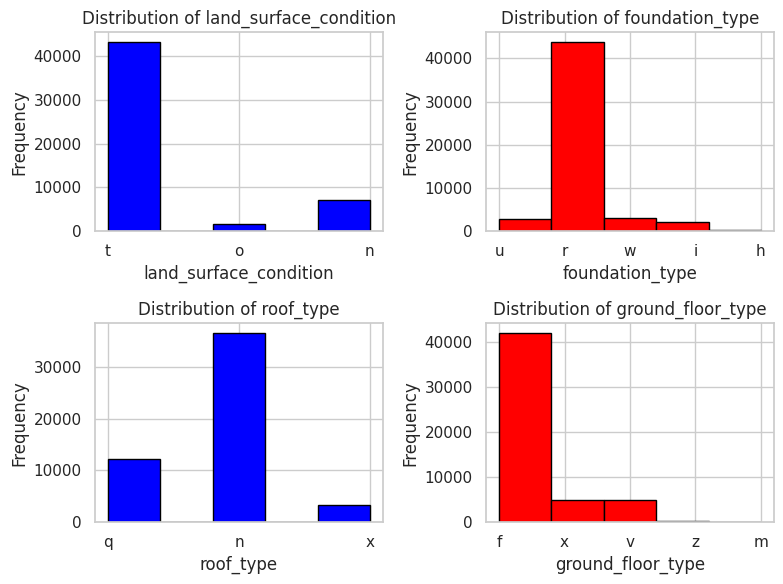

In [ ]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Plot the distribution of land_surface_condition
axes[0, 0].hist(testFeatures['land_surface_condition'], bins=5, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribution of land_surface_condition')
axes[0, 0].set_xlabel('land_surface_condition')
axes[0, 0].set_ylabel('Frequency')

# Plot the distribution of foundation_type
axes[0, 1].hist(testFeatures['foundation_type'], bins=5, color='red', edgecolor='black')
axes[0, 1].set_title('Distribution of foundation_type')
axes[0, 1].set_xlabel('foundation_type')
axes[0, 1].set_ylabel('Frequency')

# Plot the distribution of roof_type
axes[1, 0].hist(testFeatures['roof_type'], bins=5, color='blue', edgecolor='black')
axes[1, 0].set_title('Distribution of roof_type')
axes[1, 0].set_xlabel('roof_type')
axes[1, 0].set_ylabel('Frequency')

# Plot the distribution of ground_floor_type
axes[1, 1].hist(testFeatures['ground_floor_type'], bins=5, color='red', edgecolor='black')
axes[1, 1].set_title('Distribution of ground_floor_type')
axes[1, 1].set_xlabel('ground_floor_type')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Same as traing data, we see biased features due to imblanced scales of data. Therefore, we use decision-tree methods such as Xgboost, Light Xgboost to avoid this question, instead of resampling.

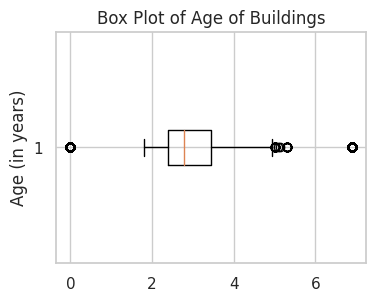

In [ ]:
# Since there is no missing value, we then consider about Outliers.
# In the EDA, we found "Age" might have potential outliers.
plt.figure(figsize=(4, 3))
plt.boxplot(testFeatures['age'],vert = False)
plt.title('Box Plot of Age of Buildings')
plt.ylabel('Age (in years)')
plt.show()

In [ ]:
# Identify outliers in the updated 'age' column
Q1_log = testFeatures['age'].quantile(0.25)
Q3_log = testFeatures['age'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Filter out outliers in the log transformed age
log_age_no_outliers = testFeatures['age'].apply(lambda x: upper_bound_log if x > upper_bound_log else (lower_bound_log if x < lower_bound_log else x))

log_age_no_outliers

0        3.713572
1        3.433987
2        3.713572
3        3.044522
4        1.791759
           ...   
52116    2.397895
52117    3.044522
52118    2.397895
52119    2.397895
52120    1.791759
Name: age, Length: 52121, dtype: float64

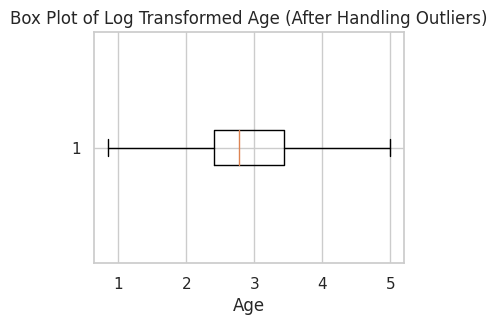

In [ ]:
# Visualize the box plot of log_age after handling outliers
plt.figure(figsize=(4, 3))
plt.boxplot(log_age_no_outliers, vert=False)
plt.title('Box Plot of Log Transformed Age (After Handling Outliers)')
plt.xlabel('Age')
plt.show()

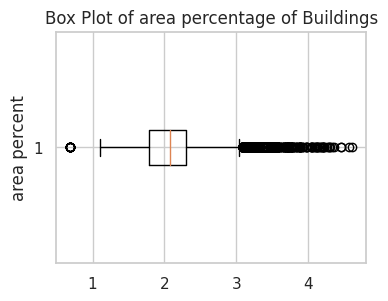

In [ ]:
# In the EDA, we found "area_percentage" might have potential outliers even if we use log-transformation.
plt.figure(figsize=(4, 3))
plt.boxplot(testFeatures['area_percentage'], vert = False)
plt.title('Box Plot of area percentage of Buildings')
plt.ylabel('area percent')
plt.show()

In [ ]:
# Identify outliers in the updated 'area_percentage' column
Q1_log = testFeatures['area_percentage'].quantile(0.25)
Q3_log = testFeatures['area_percentage'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Filter out outliers in the log transformed area
log_area_no_outliers = testFeatures['area_percentage'].apply(lambda x: upper_bound_log if x > upper_bound_log else (lower_bound_log if x < lower_bound_log else x))

log_area_no_outliers

0        2.079442
1        1.791759
2        2.302585
3        1.791759
4        2.079442
           ...   
52116    1.386294
52117    2.079442
52118    1.945910
52119    2.639057
52120    2.484907
Name: area_percentage, Length: 52121, dtype: float64

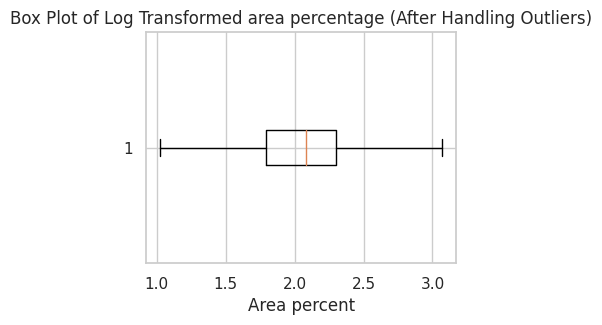

In [ ]:
# Visualize the box plot of log_area_percent after handling outliers
plt.figure(figsize=(4, 3))
plt.boxplot(log_area_no_outliers, vert=False)
plt.title('Box Plot of Log Transformed area percentage (After Handling Outliers)')
plt.xlabel('Area percent')
plt.show()

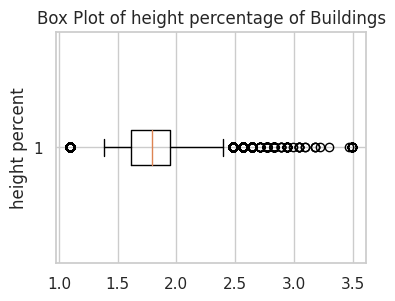

In [ ]:
# In the EDA, we found "height_percentage" might have potential outliers even if we use log-transformation.
plt.figure(figsize=(4, 3))
plt.boxplot(testFeatures['height_percentage'], vert = False)
plt.title('Box Plot of height percentage of Buildings')
plt.ylabel('height percent')
plt.show()

In [ ]:
# Identify outliers in the updated 'height' column
Q1_log = testFeatures['height_percentage'].quantile(0.25)
Q3_log = testFeatures['height_percentage'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Filter out outliers in the log transformed height
log_high_no_outliers = testFeatures['height_percentage'].apply(lambda x: upper_bound_log if x > upper_bound_log else (lower_bound_log if x < lower_bound_log else x))

log_high_no_outliers

0        1.791759
1        1.791759
2        1.791759
3        2.079442
4        1.945910
           ...   
52116    1.791759
52117    1.386294
52118    1.791759
52119    1.791759
52120    1.945910
Name: height_percentage, Length: 52121, dtype: float64

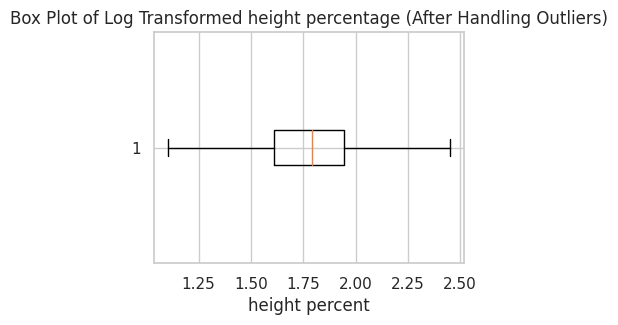

In [ ]:
# Visualize the box plot of log_high_percent after handling outliers
plt.figure(figsize=(4, 3))
plt.boxplot(log_high_no_outliers, vert=False)
plt.title('Box Plot of Log Transformed height percentage (After Handling Outliers)')
plt.xlabel('height percent')
plt.show()

In [ ]:
# Create the interaction feature: building_volume
testFeatures['building_volume'] = log_area_no_outliers * log_high_no_outliers

# Binning the 'age' feature
bins = [0, 25, 75, float('inf')]
labels = ['new', 'moderately_old', 'old']
testFeatures['age_category'] = pd.cut(log_age_no_outliers, bins=bins, labels=labels, right=False)
testFeatures[['building_volume', 'age', 'age_category']].head()

,building_volume,age,age_category
0,3.725859,3.713572,new
1,3.210402,3.433987,new
2,4.125679,3.713572,new
3,3.725859,3.044522,new
4,4.046406,1.791759,new


In [ ]:
# One-hot encode the categorical features
categorical_features1 = ['other_floor_type','position','plan_configuration','land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'age_category','legal_ownership_status']
data_encoded1 = pd.get_dummies(testFeatures, columns=categorical_features1, drop_first=True)

In [ ]:
# Standardize the numerical features
numerical_features1 = ['count_floors_pre_eq', 'age', 'building_volume']
data_encoded1[numerical_features] = (data_encoded1[numerical_features] - data_encoded1[numerical_features].mean()) / data_encoded1[numerical_features].std()

data_encoded1['area_percentage'] = (log_area_no_outliers - log_area_no_outliers.mean())/log_area_no_outliers.std()
data_encoded1['height_percentage'] = (log_high_no_outliers - log_high_no_outliers.mean())/log_high_no_outliers.std()

In [ ]:
data_encoded1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52121 entries, 0 to 52120
Data columns (total 64 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   building_id                             52121 non-null  int64  
 1   geo_level_1_id                          52121 non-null  int64  
 2   geo_level_2_id                          52121 non-null  int64  
 3   geo_level_3_id                          52121 non-null  int64  
 4   count_floors_pre_eq                     52121 non-null  float64
 5   age                                     52121 non-null  float64
 6   area_percentage                         52121 non-null  float64
 7   height_percentage                       52121 non-null  float64
 8   has_superstructure_adobe_mud            52121 non-null  int64  
 9   has_superstructure_mud_mortar_stone     52121 non-null  int64  
 10  has_superstructure_stone_flag           52121 non-null  in

In [ ]:
# Extract the test dataset
X_test = data_encoded1.drop(['building_id'], axis=1)
# Predict probabilities on your test dataset
test_probs = final_model.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] feature_fraction is set=0.7999893611652821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7999893611652821
[LightGBM] [Warning] bagging_fraction is set=0.7793838189048787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7793838189048787
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [ ]:
# See below for an example of exporting a pandas data frame called "submission" to a csv file.
submission = pd.DataFrame({
    'id': data_encoded1['building_id'],
    'predicted': test_probs})
submission.to_csv("submission.csv", index=False)

# Conclusion:
When we use Xgboost and LightGBM algorithm to train the dataset without feature selection, we detected LightGBM (0.44) has lower log-loss function than Xgboost(0.46), which means higher probability to get the correct prediction. Therefore, we tune hyperparameters on LightGBM to find the best parameters which lead to lower log-loss functions. Here we use Optuna, a hyperparameter optimization framework to adjust the hyperparameter and find the best combination. After training, we concluded that for LightGBM with the best parameter as \{'num_leaves': 184,
  'feature_fraction': 0.5839862286869117,
  'bagging_fraction': 0.7408744137746961,
  'bagging_freq': 4,
  'min_child_samples': 89\}, we got the lowest log-loss function score as 0.43095676125101723.

Meanwhile, we do the same operation with top 20's features selection, we found the final tuned best parameter as \{'num_leaves': 206,
  'feature_fraction': 0.8978704286320136,
  'bagging_fraction': 0.45296293903378426,
  'bagging_freq': 2,
  'min_child_samples': 35\}, and the lowest log-loss function score as 0.44351717013652403.

Therefore, we choose optuna-tuned LightBGM without feature selection to get the best prediction. And we use this model for the final prediction on test dataset.

After submitting our prediction to Kaggle, we got the log-loss score for test dataset as around 0.42, which is the top-10 prediction among all ranks. So I believe this is a good prediction.

# Insight:

We detected the feature importance in the model building part. And visualize them in the bar-charts (shown above).

We found that for different models (Xgboost vs LightGBM), the feature influence on final predictions are different.


For Xgboost: the top 5 feature are 'foundation_type_r', 'ground_floor_type_v','foundation_type_w', 'geo_level_1_id', 'has_superstructure_cement_mortar_brick'.

For LightGBM: the top 5 feature are 'geo_level_2_id','geo_level_3_id','geo_level_1_id','building_volume','age".

Therefore, it makes sense that the second model has better prediction, since the geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3) should be a big influence on the degree of damage.